In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

------------
### 1. Create a dataset

In [2]:
X, y = make_blobs(n_samples=500,centers=2,cluster_std=2,random_state=15,
                 center_box=(-8,2))

In [3]:
X.shape

(500, 2)

In [4]:
y=np.array([y])

In [5]:
y=y.T

In [6]:
y.shape

(500, 1)

#### Creating a Dataframe 

In [7]:
X_df=pd.DataFrame(X,columns=['Feature 0','Feature 1'])
y_df=pd.DataFrame(y,columns=['Class'])

In [8]:
frames=[X_df,y_df]

In [9]:
DATA=pd.concat(frames,axis=1)

In [10]:
DATA.head()

,Feature 0,Feature 1,Class
0,-1.184146,-6.378497,0
1,1.649869,-11.854625,0
2,-1.305050,-4.444510,0
3,-4.973320,-6.315187,0
4,2.619928,-6.319133,0


#### Visualising Dataset

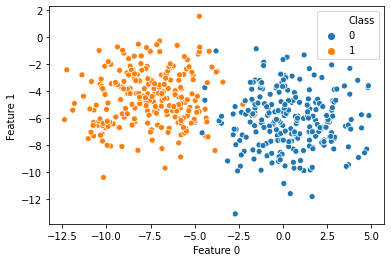

In [11]:
sns.scatterplot(x='Feature 0', y='Feature 1', hue='Class', data=DATA)

------------
### 2. Creating Decision Surface

#### Obtaining the corner co-ordinates for decision surface

In [12]:
max1, min1 = X[:,0].max()+1 , X[:,0].min() - 1
max2, min2 = X[:,1].max()+1 , X[:,1].min() - 1

#### Obtaining x- axis and y- axis

In [13]:
x1grid= np.arange(min1, max1, 0.1)
x2grid= np.arange(min2, max2, 0.1)

#### Generating the mesh

In [14]:
xx, yy= np.meshgrid(x1grid, x2grid)

#### Arranging the mesh points in the form of given dataset

In [15]:
r1,r2 = xx.flatten(), yy.flatten()

r1=r1.reshape(len(r1),1)
r2=r2.reshape(len(r2),1)

#### Stacking the vectors, in the form of feature matrix

In [16]:
grid= np.hstack((r1,r2))

---------------
### 3. Creating the model

In [17]:
model= LogisticRegression()

model.fit(X,y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
yhat = model.predict(X)   # To compute model's accuracy

In [19]:
surface_predictions= model.predict(grid)   # To generate decision surface

#### Model accuracy

In [20]:
accuracy=accuracy_score(yhat, y)

In [21]:
print('Accuracy: ',accuracy)

Accuracy:  0.984


-------------
### 4. Plotting the Surface and Data points

#### Arranging the predictions in the form of mesh

In [22]:
zz= surface_predictions.reshape(xx.shape)

#### Plotting of decision surface and then data points on it

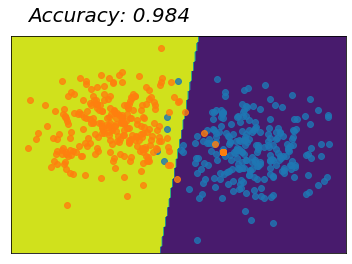

In [23]:
fig,axes= plt.subplots()

axes.contourf(xx,yy,zz) # Plotting the decision surface

for class_value in range(2):
    # finding row index
    row_ix = np.where(y==class_value)
    
    # plotting the data points
    axes.scatter(X[row_ix,0],X[row_ix,1],alpha=0.8)  # Plotting data points
    

  
##########

axes.text(min1+1,max2+1,'Accuracy: {}'.format(accuracy), style='italic',
         fontsize=20)
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

----------------------
-----------

## Variations that can be adopted:

-------

- We can change the model; **LogisticRegression** here, to any other linearly classifying model.
    - Ex-> **Kernel SVC** or **LinearSVC**, others
 
 
- Above, we plotted dataset containing $2$ labels only; 0 and 1. We can increase the number of labels.
    - In **make_blobs()**; change $centers$.
    
----------
    
**Thank You**